In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df= pd.read_csv(r'..\data\raw\traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [100]:
df.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [101]:
df.shape

(48120, 4)

In [102]:
df=df[['DateTime', 'Junction', 'Vehicles']]
df.head()

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [104]:
df['DateTime']=pd.to_datetime(df['DateTime'])

In [105]:
df.head()

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9


In [106]:
# group by terminal and report period
df_grouped=df.groupby(['Junction', 'DateTime']).sum().reset_index()
df_grouped.head()

,Junction,DateTime,Vehicles
0,1,2015-11-01 00:00:00,15
1,1,2015-11-01 01:00:00,13
2,1,2015-11-01 02:00:00,10
3,1,2015-11-01 03:00:00,7
4,1,2015-11-01 04:00:00,9


In [107]:
# group by daily
# df_grouped['Date']=df_grouped['DateTime'].dt.date
# df_grouped= df_grouped.drop('DateTime', axis=1)
# df_grouped_daily=df_grouped.groupby(['Junction', 'Date']).sum().reset_index()

In [108]:
df_grouped['Junction'].value_counts()

Junction
1    14592
2    14592
3    14592
4     4344
Name: count, dtype: int64

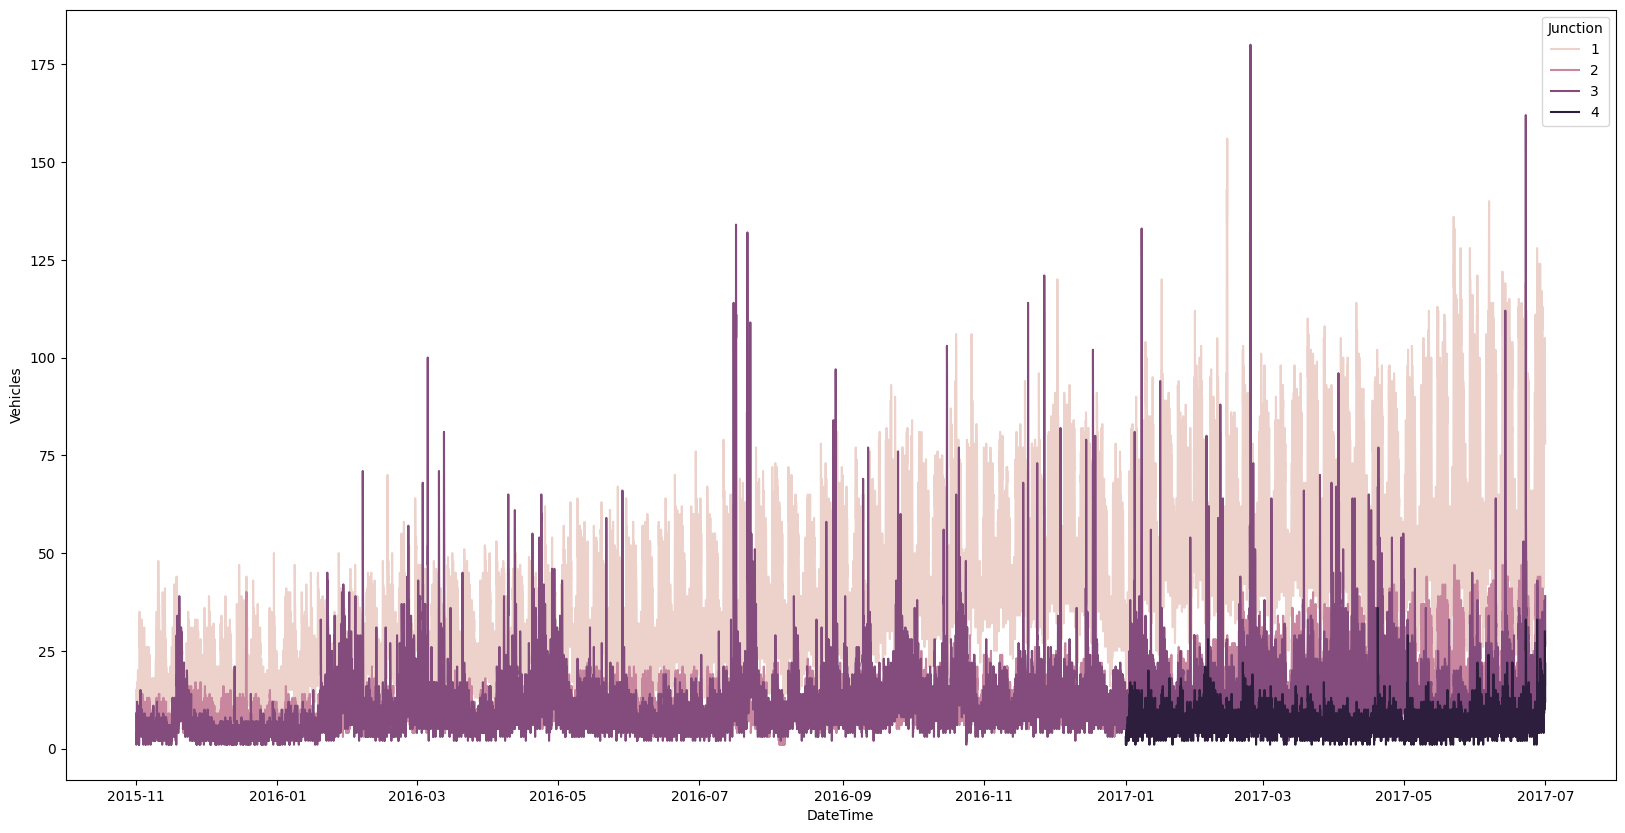

In [109]:
# plot the vehicles with respect to time . put the junctions in different plots
plt.figure(figsize=(20,10))
sns.lineplot(x='DateTime', y='Vehicles', data=df_grouped, hue='Junction')
plt.show()

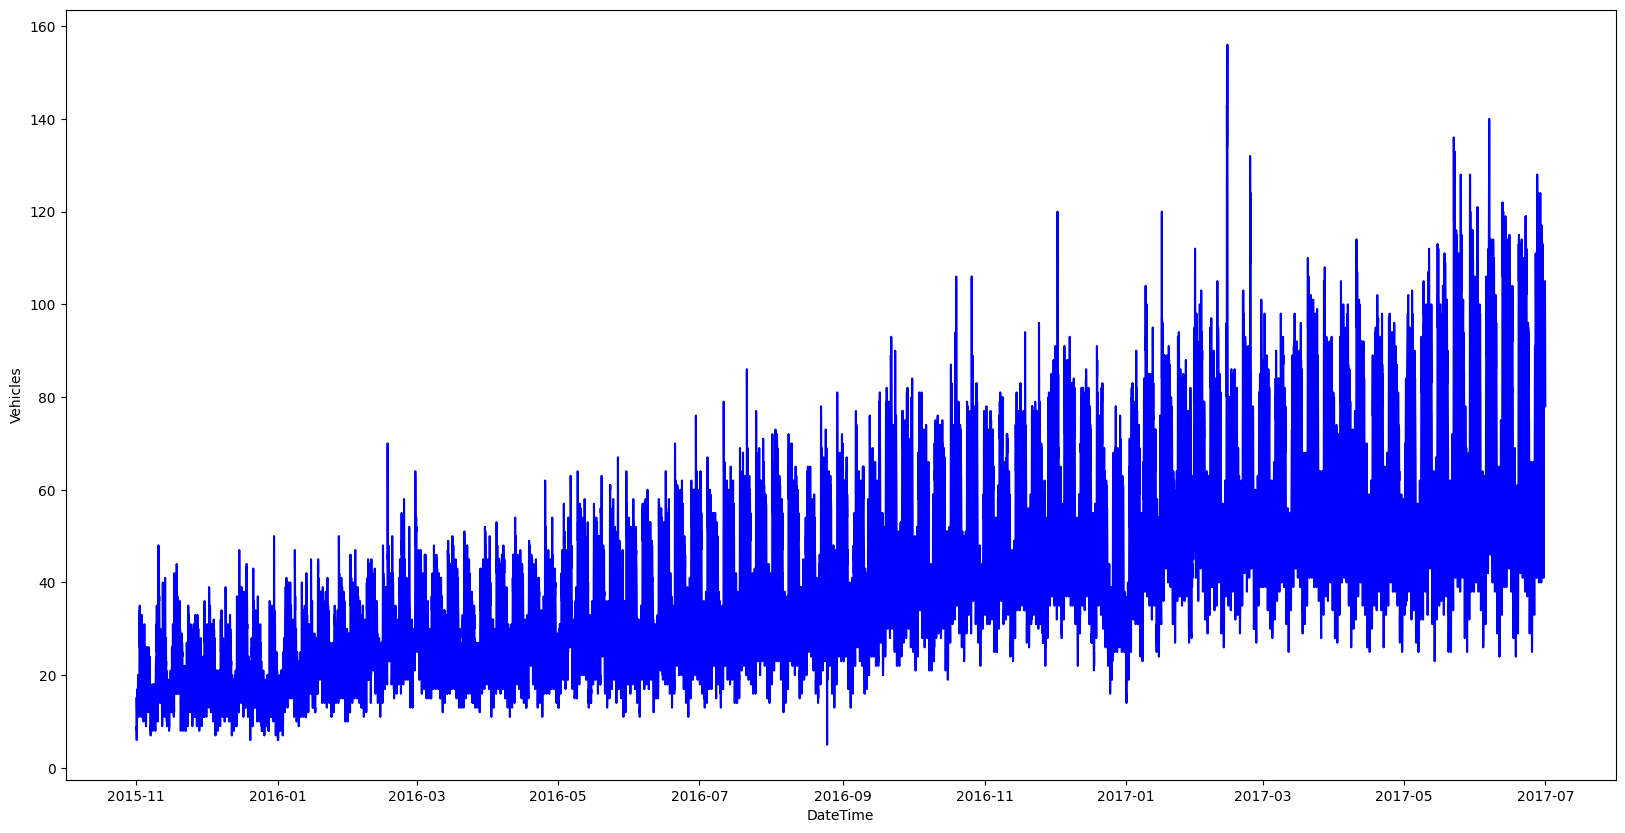

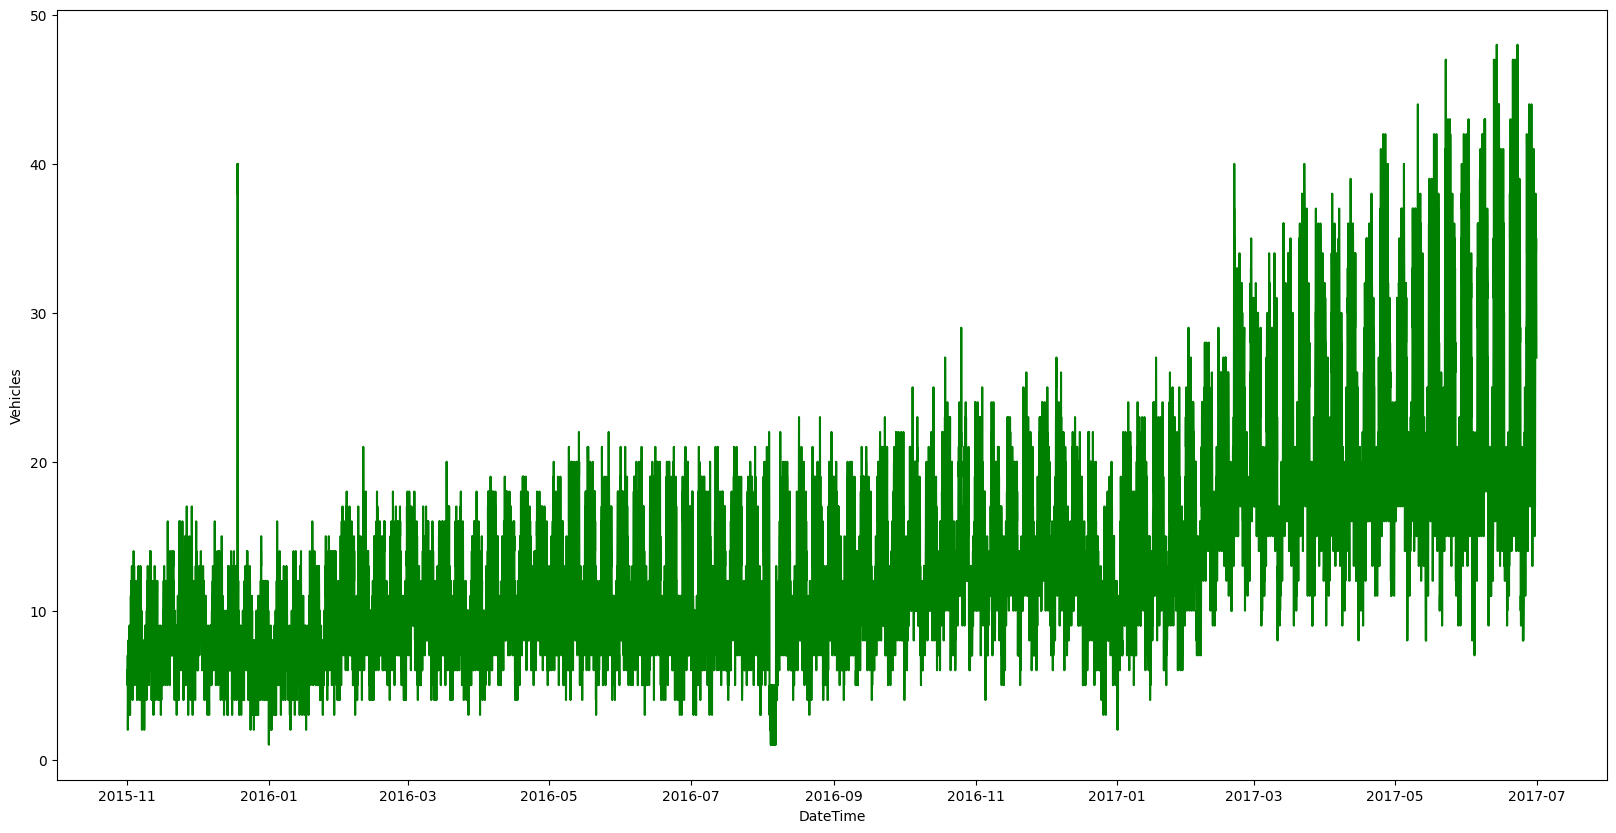

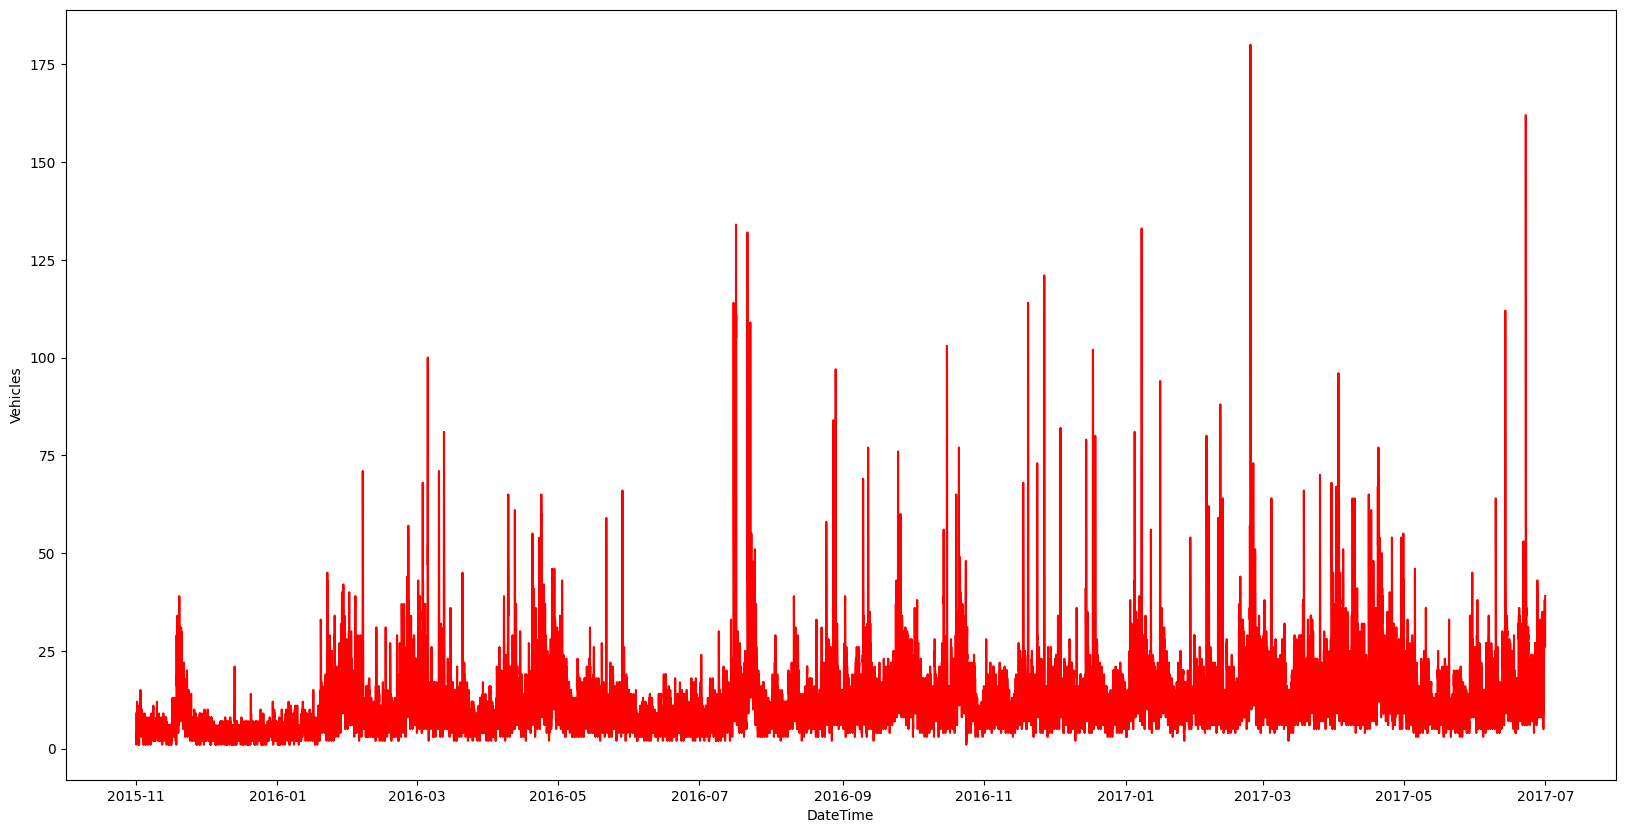

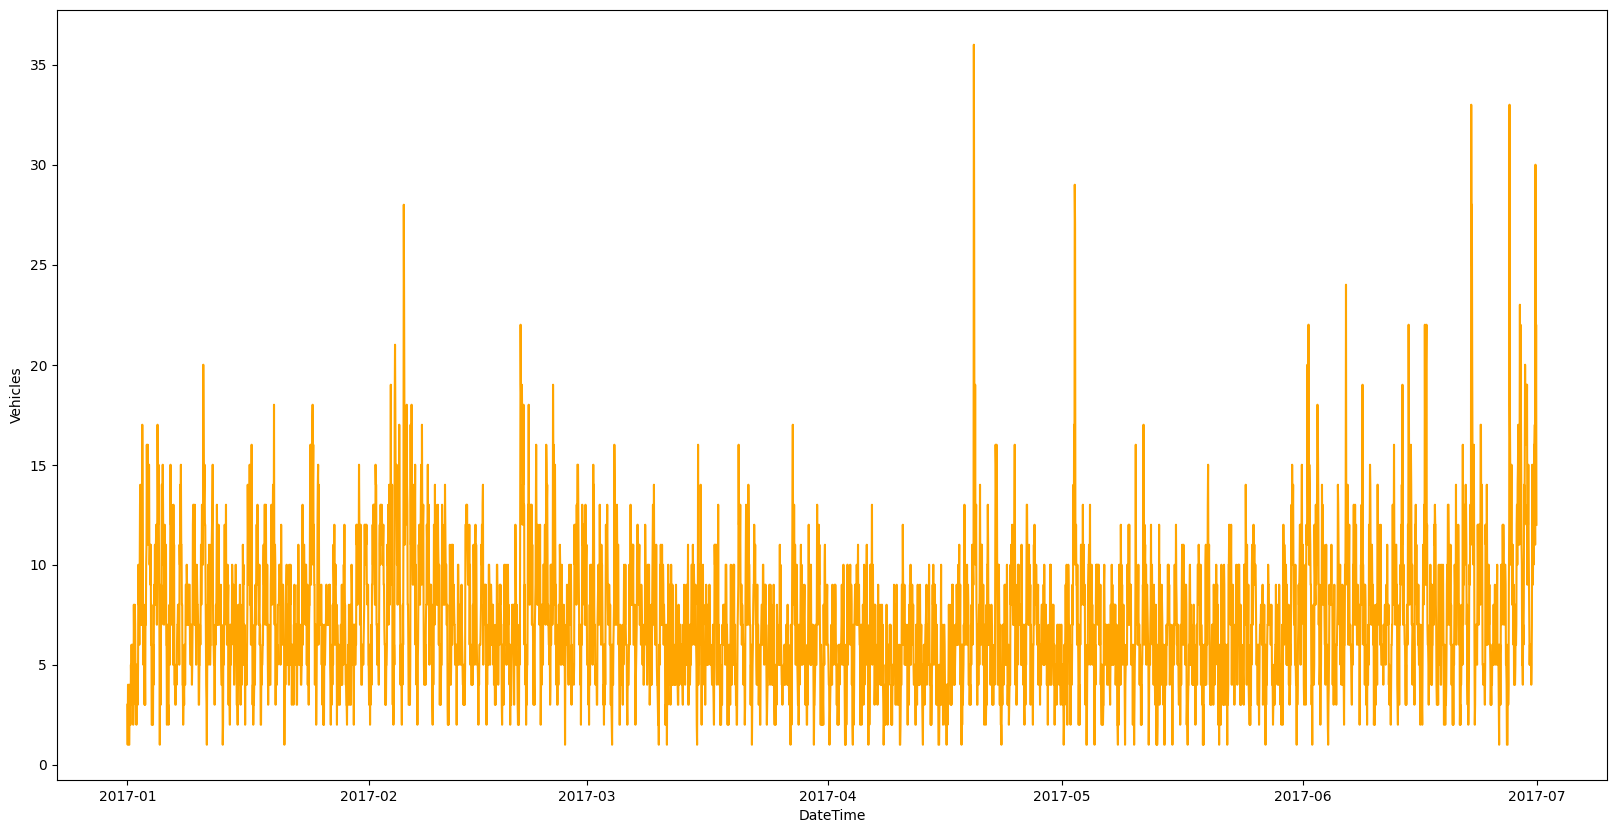

In [110]:
# plot junctions in different subplots
plt.figure(figsize=(20,10))
sns.lineplot(x='DateTime', y='Vehicles', data=df_grouped[df_grouped['Junction']==1], color='blue')  
plt.show()

plt.figure(figsize=(20,10))
sns.lineplot(x='DateTime', y='Vehicles', data=df_grouped[df_grouped['Junction']==2], color='green')
plt.show()

plt.figure(figsize=(20,10))
sns.lineplot(x='DateTime', y='Vehicles', data=df_grouped[df_grouped['Junction']==3], color='red')
plt.show()

plt.figure(figsize=(20,10))
sns.lineplot(x='DateTime', y='Vehicles', data=df_grouped[df_grouped['Junction']==4], color='orange')
plt.show()

In [111]:
df_grouped

,Junction,DateTime,Vehicles
0,1,2015-11-01 00:00:00,15
1,1,2015-11-01 01:00:00,13
2,1,2015-11-01 02:00:00,10
3,1,2015-11-01 03:00:00,7
4,1,2015-11-01 04:00:00,9
...,...,...,...
48115,4,2017-06-30 19:00:00,11
48116,4,2017-06-30 20:00:00,30
48117,4,2017-06-30 21:00:00,16
48118,4,2017-06-30 22:00:00,22


In [116]:
df_grouped=df_grouped[df_grouped['Junction']!=4]

In [117]:
df_grouped.head()

,Junction,DateTime,Vehicles
0,1,2015-11-01 00:00:00,15
1,1,2015-11-01 01:00:00,13
2,1,2015-11-01 02:00:00,10
3,1,2015-11-01 03:00:00,7
4,1,2015-11-01 04:00:00,9


In [118]:
df_grouped['Junction'].value_counts()

Junction
1    14592
2    14592
3    14592
Name: count, dtype: int64

In [119]:
df_grouped.isnull().sum()

Junction    0
DateTime    0
Vehicles    0
dtype: int64

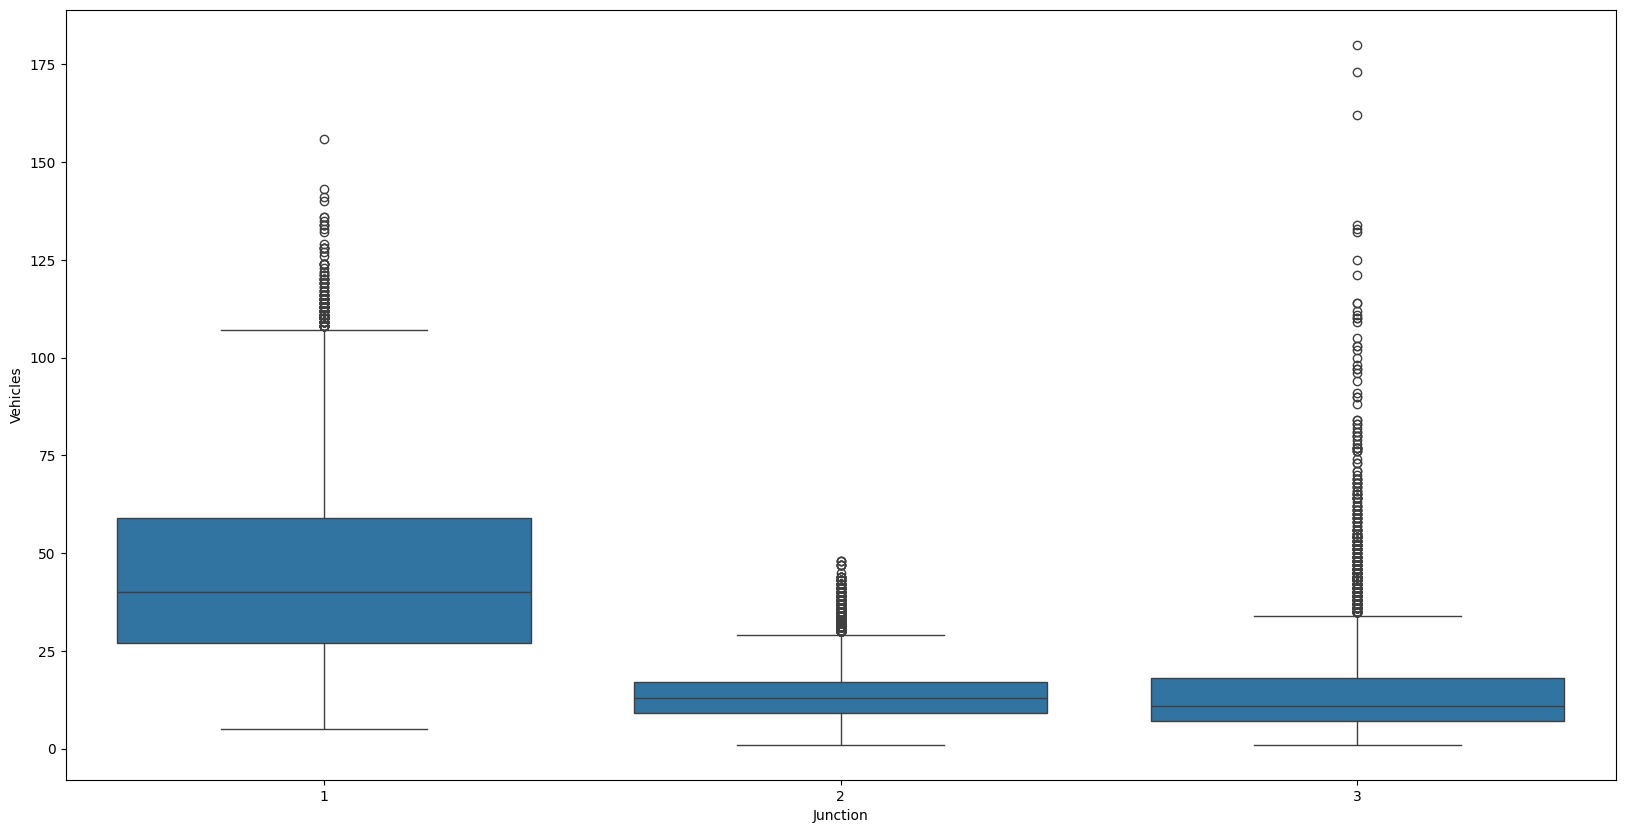

In [120]:
# draw box plot to see the distribution of vehicles
plt.figure(figsize=(20,10))
sns.boxplot(x='Junction', y='Vehicles', data=df_grouped)
plt.show()

1


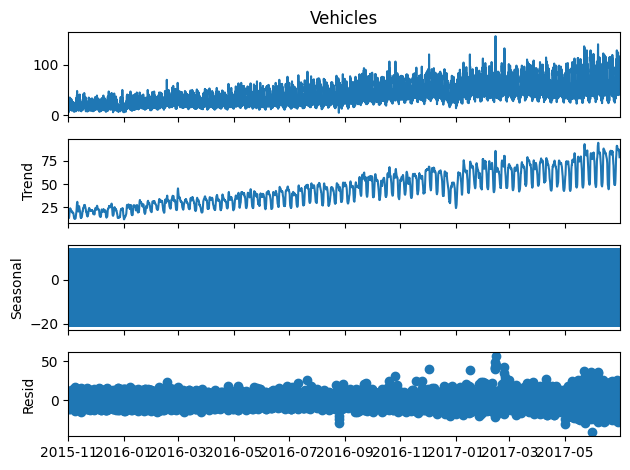

2


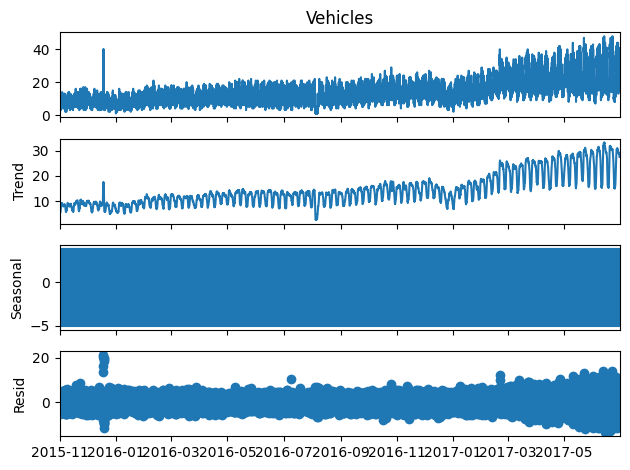

3


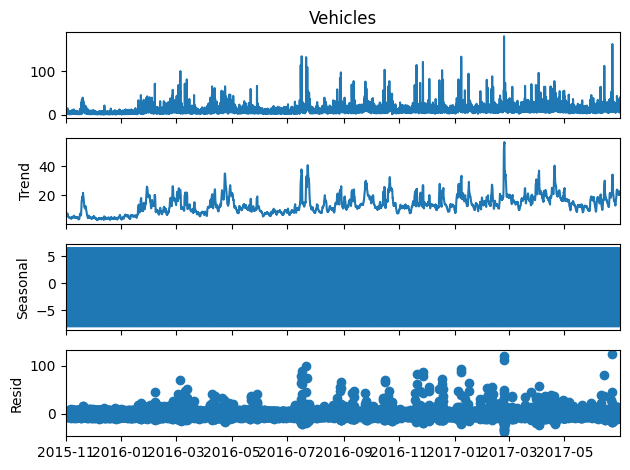

In [125]:
# plot time series decomposition for each terminal
from statsmodels.tsa.seasonal import seasonal_decompose
for junction in df_grouped['Junction'].unique():
    print(junction)
    df_junction=df_grouped[df_grouped['Junction']==junction]
    df_junction=df_junction.set_index('DateTime')
    result = seasonal_decompose(df_junction['Vehicles'], model='additive')
    result.plot()
    plt.show()